In [431]:
import numpy as np
import matplotlib.pyplot as plt
import pydot
import pickle
import pathlib
import os
from scipy import stats
import random
from sklearn.metrics import r2_score
plt.rcParams['figure.figsize'] = [10, 5]
#import unicode

from scipy.optimize import curve_fit
import re
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import statistics
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance
from scipy.stats import norm

In [432]:
#directory = str(pathlib.Path(__file__).parent.resolve())
#script_path = str(pathlib.Path(__file__).parent.resolve())
directory = os.getcwd()
script_path = os.getcwd()
nameset,dictset = [],[]
refnameset,refdictset = [],[]

refsortset = []
sortset = []


for filename in os.listdir(directory):
    if filename.endswith(".txt") and '._' not in filename:
        if 'REF' not in filename:
            impath = os.path.join(directory, filename)
            nameset.append(impath)
            this_set = dict()
            with (open(impath, encoding = 'utf8', errors = 'ignore')) as f: #populate dict from text file
                for n in f:
                    pog = n.split('\t')
                    this_set[pog[0]] = pog[-1].count(',')
                f.close()
            try:
                this_set.pop('cell_name')
                this_set.pop('AB')
            except: pass
            dictset.append(this_set)
            sortset.append((impath, this_set))
        else:
            impath = os.path.join(directory, filename)
            refnameset.append(impath)
            this_set = dict()
            with (open(impath, encoding = 'utf8', errors = 'ignore')) as f: #populate dict from text file
                for n in f:
                    pog = n.split('\t')
                    this_set[pog[0]] = pog[-1].count(',')
                f.close()
            try:
                this_set.pop('cell_name')
                this_set.pop('AB')
            except: pass
            refdictset.append(this_set)
            refsortset.append((impath, this_set))
            
    
print(len(dictset),len(nameset))
print(len(refdictset),len(refnameset))
truncator = len(nameset)

nameset,dictset = [],[]
for n in sorted(sortset):
    nameset.append(n[0]);dictset.append(n[1])

refnameset,refdictset = [],[]
for n in sorted(refsortset):
    refnameset.append(n[0]);refdictset.append(n[1])

1322 1322
30 30


In [433]:
def remove_dangling_children(oldshi):
    poor = list(oldshi);dishi = dict()
    for n in range(1,len(poor)-1):
        if (len(poor[n]) == len(poor[n+1]) or len(poor[n]) == len(poor[n-1])) == False: dishi[poor[n]] = oldshi[poor[n]]
    return dishi

#'''
nameset,dictset = [],[]
for n in sorted(sortset):
    nameset.append(n[0]);dictset.append(remove_dangling_children(n[1]))
    
refnameset,refdictset = [],[]
for n in sorted(refsortset):
    refnameset.append(n[0]);refdictset.append(remove_dangling_children(n[1]))
#'''

In [434]:
#part 1 of common node
refnodelist = set(refdictset[0])
for n in refdictset:
    refnodelist = set(n).intersection(refnodelist)

In [435]:
#part 2 of common node
newdictset = []
for n in refdictset:
    newdict = dict()
    for i in refnodelist:
        newdict[i] = n[i]
    #print(set(newdict).issubset(set(n)))
    #print(len(newdict))
    newdictset.append(newdict)

#print(set(newdict).issubset(set(n)))
refdictset = newdictset

In [436]:
def scramble(dict_list):
    dict_return = []
    for element in dict_list:
        valuescramble = list(element.values())
        random.shuffle(valuescramble)
        keyscramble = list(element)
        random.shuffle(keyscramble)
        new_element = dict()
        for n in range(0,len(keyscramble)):
            new_element[keyscramble[n]] = valuescramble[n]
        dict_return.append(new_element)
    return dict_return
def globalize(dictn):
    globaldictset = []
    for i in dictn:
        tags = sorted(list(i));dip = dict()
        for n in tags:
            if n[0:-1] in i:
                dip[n] = i[n] + dip[n[:-1]]
            else: dip[n] = i[n]    
        globaldictset.append(dip)
    return globaldictset

In [437]:
#scrambledictset = scramble(dictset)
globaldictset = globalize(dictset)
#globalscrambledictset = globalize(scrambledictset)

#refscrambledictset = scramble(refdictset)
refglobaldictset = globalize(refdictset)
#refglobalscrambledictset = globalize(refscrambledictset)

In [438]:
qf = pd.read_csv('1368-embryos.csv', header=None).iloc[0]
df = pd.read_csv('1368-embryos.csv')
rdf = df.sort_values(by = 'embryo-ID')
cuttags = ['ABa','ABp','C','D','E','MS','P']
rearranger = [0,1,4,5,3,2,6]

match_links = [];match_links2 = []

findit = 0;notin = 0

o = 0
for n in range(0,df.shape[0]):
    #print(rdf.iloc[n][1] in nameset[o])
    if rdf.iloc[n][1] in nameset[o]:
        #match_links.append((o,n)) #, o in nameset, #n in dataframe
        match_links.append(n) #index is o in nameset, list value is n in dataframe
        tagref = 0
        for nm in list(globaldictset[o]):
            if cuttags[tagref] not in nm:
                try:
                    tagref = tagref + 1
                    if tagref > 6:
                        break
                except:
                    break
            #findit = findit + (globaldictset[o][nm] >= rdf.iloc[n][rearranger[tagref]+5])
            if (globaldictset[o][nm] >= rdf.iloc[n][rearranger[tagref]+5]): 
                #print(nameset[o].split('/')[-1])
                #print(rdf.iloc[n][1])
                #print('tag',o,'embryo',n,nm,globaldictset[o][nm],rdf.iloc[n][rearranger[tagref]+5])
                del dictset[o][nm]
        o = o + 1
    else:
        pass
        match_links2.append((o,-1))
        #match_links2.append(-1)
o,n

(1322, 1367)

In [410]:
def plot_2_examples(colormaps,imp): #heatmap matrix plotting function
    data = imp;n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n, n),
                            constrained_layout=False, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=(int(10*np.amin(imp))/10.0), vmax=(int(10*np.amax(imp))/10.0))
        fig.colorbar(psm, ax=ax)
    plt.title('Distance between times in WT C. Elegans')
    #plt.figure(figsize = (15,8))
    plt.gcf().set_size_inches(35, 25)
    plt.show()

In [622]:
def variable_nodes(dict1,root_node):
    tip = dict()
    for n in [x for x in dict1 if re.search(root_node, x)]: tip[n] = dict1[n]
    return tip

def tree_edit_distance(dict1,dict2): return (len((set(dict1).union(set(dict2))))-len((set(dict1).intersection(set(dict2)))))

def branch_distance(dict1,dict2): #issa metric from deeds
    branch_dist = 0
    for n in list(set(dict1).intersection(set(dict2))):
        branch_dist = branch_dist + (dict1[n]-dict2[n])**2
    return (np.sqrt(branch_dist))

def jaccard_distance(dict1,dict2):
    onion = len(set(dict1).union(set(dict2)))
    #entry = len(set(dict1).intersection(set(dict2)))
    #print((onion - len(set(dict1).intersection(set(dict2)))) / onion)
    return ((onion - len(set(dict1).intersection(set(dict2)))) / onion)
    #return (len((set(dict1).union(set(dict2))))-len((set(dict1).intersection(set(dict2)))))
    
def node_comparison_trimmer(dict1,root_node):
    tip = dict()
    if root_node == 'EMS':
        root_node = 'Q'
        for n in [x for x in dict1 if re.search('E', x) or re.search('MS', x)]:
            #print(n)
            if n[0] == 'E':
                #print('Qp'+n[1:],dict1[n])
                dict1['Qp'+n[1:]] = dict1[n]
            else:
                #print('Qa'+n[2:],dict1[n])
                dict1['Qa'+n[2:]] = dict1[n]
    for n in [x for x in dict1 if re.search(root_node, x)]: 
        #print(n)
        m = n.replace('r', "p").replace('v', "p")
        m = m.replace('d', "a").replace('l', "a")
        m = m[len(root_node):]
        #print(m,'\n')
        #trope = n[len(root_node):]
        #trope = trope.replace('d', "a").replace('l', "a")
        #trope = trope.replace('v', "p").replace('r', "p")
        tip[m] = dict1[n]
    return tip

In [624]:
fulldictset = refdictset + dictset;fullnameset = refnameset + nameset

In [625]:
RNAi_size_assignments = dict()
RNAi_name_array = []
for n in range(0,len(nameset)):
    pad = nameset[n].split('/')[-1][:-14]
    #print(pad,n)
    RNAi_name_array.append(pad)
    try:
        z = RNAi_size_assignments[pad]
        z.append(n)
    except:
        z = list()
        z.append(n)
        RNAi_size_assignments[pad] = z
        
RNAi_name_array = np.array(RNAi_name_array)

In [626]:
outlier_ref = [ 1,  8,  9, 10, 16, 17, 19, 20, 26]
inlier_ref = [ 0,  2,  3,  4,  5,  6,  7, 11, 12, 13, 14, 15, 16, 18, 21, 22, 23, 24, 25, 27, 28, 29]

In [627]:
Homeotic = pd.read_csv('Undefined_trans.csv')
Fates = pd.read_csv('Fate_trans.csv')

qf = pd.read_csv('Undefined_trans.csv', header=None)

In [628]:
useit = list(qf.iloc[0])[0]
useit

nan

In [629]:
qf = pd.read_csv('Fate_trans.csv', header=None)
qf = qf.fillna('0')
Fate_transforms = pd.DataFrame(qf).to_numpy()

In [630]:
useit = Fate_transforms[1,1]

In [669]:
Fate_transforms_gene_index = Fate_transforms[:,0].tolist()
Fate_transforms_gene_index = np.array([each_string.upper() for each_string in Fate_transforms_gene_index])
Fate_transforms_gene_index

array(['GENE', 'APX-1', 'ATX-2', 'C49H3.8', 'CAMT-1', 'CDC-25.1',
       'CDC-37', 'CEH-24', 'CHAF-2', 'CHK-1', 'CLS-2', 'CPL-1', 'CSN-4',
       'CUL-1', 'CUL-2', 'CUL-3', 'DIV-1', 'DLC-1', 'DLI-1', 'DRH-3',
       'F23F1.5', 'F35F11.1', 'F44B9.8', 'GEI-17', 'GLD-2', 'GLP-1',
       'GPB-1', 'GSK-3', 'HDA-1', 'HMP-2', 'LAG-1', 'LET-502', 'LIN-23',
       'MBK-2', 'MEI-1', 'MEX-3', 'MEX-5', 'MOM-2', 'MOM-5', 'NMY-2',
       'NPP-4', 'NUD-1', 'OMA-1/2', 'PAD-1', 'PAR-2', 'PAR-3', 'PAR-6',
       'PIE-1', 'PKC-3', 'POP-1', 'POS-1', 'PPFR-4', 'PUF-3', 'RAB-5',
       'RAB-7', 'RAD-51', 'RAN-4', 'RBA-1', 'RFC-3', 'RGA-3', 'RUVB-1',
       'SEL-8', 'SKN-1', 'SKR-1/2', 'SRC-1', 'SUF-1', 'T11G6.8',
       'TAG-256', 'TAT-5', 'TSR-1', 'UBA-1', 'UBC-12', 'VPS-4', 'WWP-1',
       'Y53F4B.22', 'ZYG-11', 'ZYG-12'], dtype='<U9')

In [670]:
protein_tag = 'CUL-1'
Fate_transforms[np.where(Fate_transforms_gene_index== protein_tag)[0]]

array([['cul-1', '0', '0', '0', '0', '0', 'ABal', '0', '0', 'ABara', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', 'EMS', '0', 'EMS',
        '0', '0', 'P3']], dtype=object)

In [671]:
Departing_cells = Fate_transforms[0]

In [672]:
Destination_Fate = Fate_transforms[np.where(Fate_transforms_gene_index== protein_tag)[0]]

In [673]:
cell_references_of_interest = np.where(Destination_Fate > '0')[1][1:]

In [674]:
Departing_cells = Departing_cells[cell_references_of_interest]

In [675]:
Destination_Fate_cells = Destination_Fate[0][cell_references_of_interest]

In [676]:
Departing_cells,Destination_Fate_cells

(array(['ABar', 'ABala', 'MS', 'C', 'P4'], dtype=object),
 array(['ABal', 'ABara', 'EMS', 'EMS', 'P3'], dtype=object))

In [677]:
picked_change = 2
Departing_cells[picked_change],Destination_Fate_cells[picked_change]

('MS', 'EMS')

In [678]:
inliers = np.array(inlier_ref)[sorted(random.sample(range(0, len(inlier_ref)), len(embryos_of_interest)))].tolist()
outliers = np.array(outlier_ref)[sorted(random.sample(range(0, len(outlier_ref)), min(len(outlier_ref),len(embryos_of_interest))))].tolist()
embryos_of_interest = (np.where(RNAi_name_array == protein_tag)[0]+30).tolist()

In [687]:
#grid_dims = [len(inliers),len(inliers),len(outliers),len(outliers),len(embryos_of_interest),len(embryos_of_interest)]
grid_dims = [len(inliers),2*len(inliers),2*len(inliers)+len(outliers),2*len(inliers)+2*len(outliers),2*len(inliers)+2*len(outliers)+len(embryos_of_interest)]
grid_dims,inliers,outliers,embryos_of_interest

([10, 20, 29, 38, 48],
 [2, 3, 4, 6, 16, 18, 21, 22, 27, 28],
 [1, 8, 9, 10, 16, 17, 19, 20, 26],
 [268, 269, 270, 271, 272, 273, 274, 275, 276, 277])

In [688]:
embryonic_parser = [inliers,outliers,embryos_of_interest]
altered_embryo_dict = []
for n in embryonic_parser:
    for m in n:
        altered_embryo_dict.append(node_comparison_trimmer(fulldictset[m],Departing_cells[picked_change]))
    for m in n:
        altered_embryo_dict.append(node_comparison_trimmer(fulldictset[m],Destination_Fate_cells[picked_change]))

58

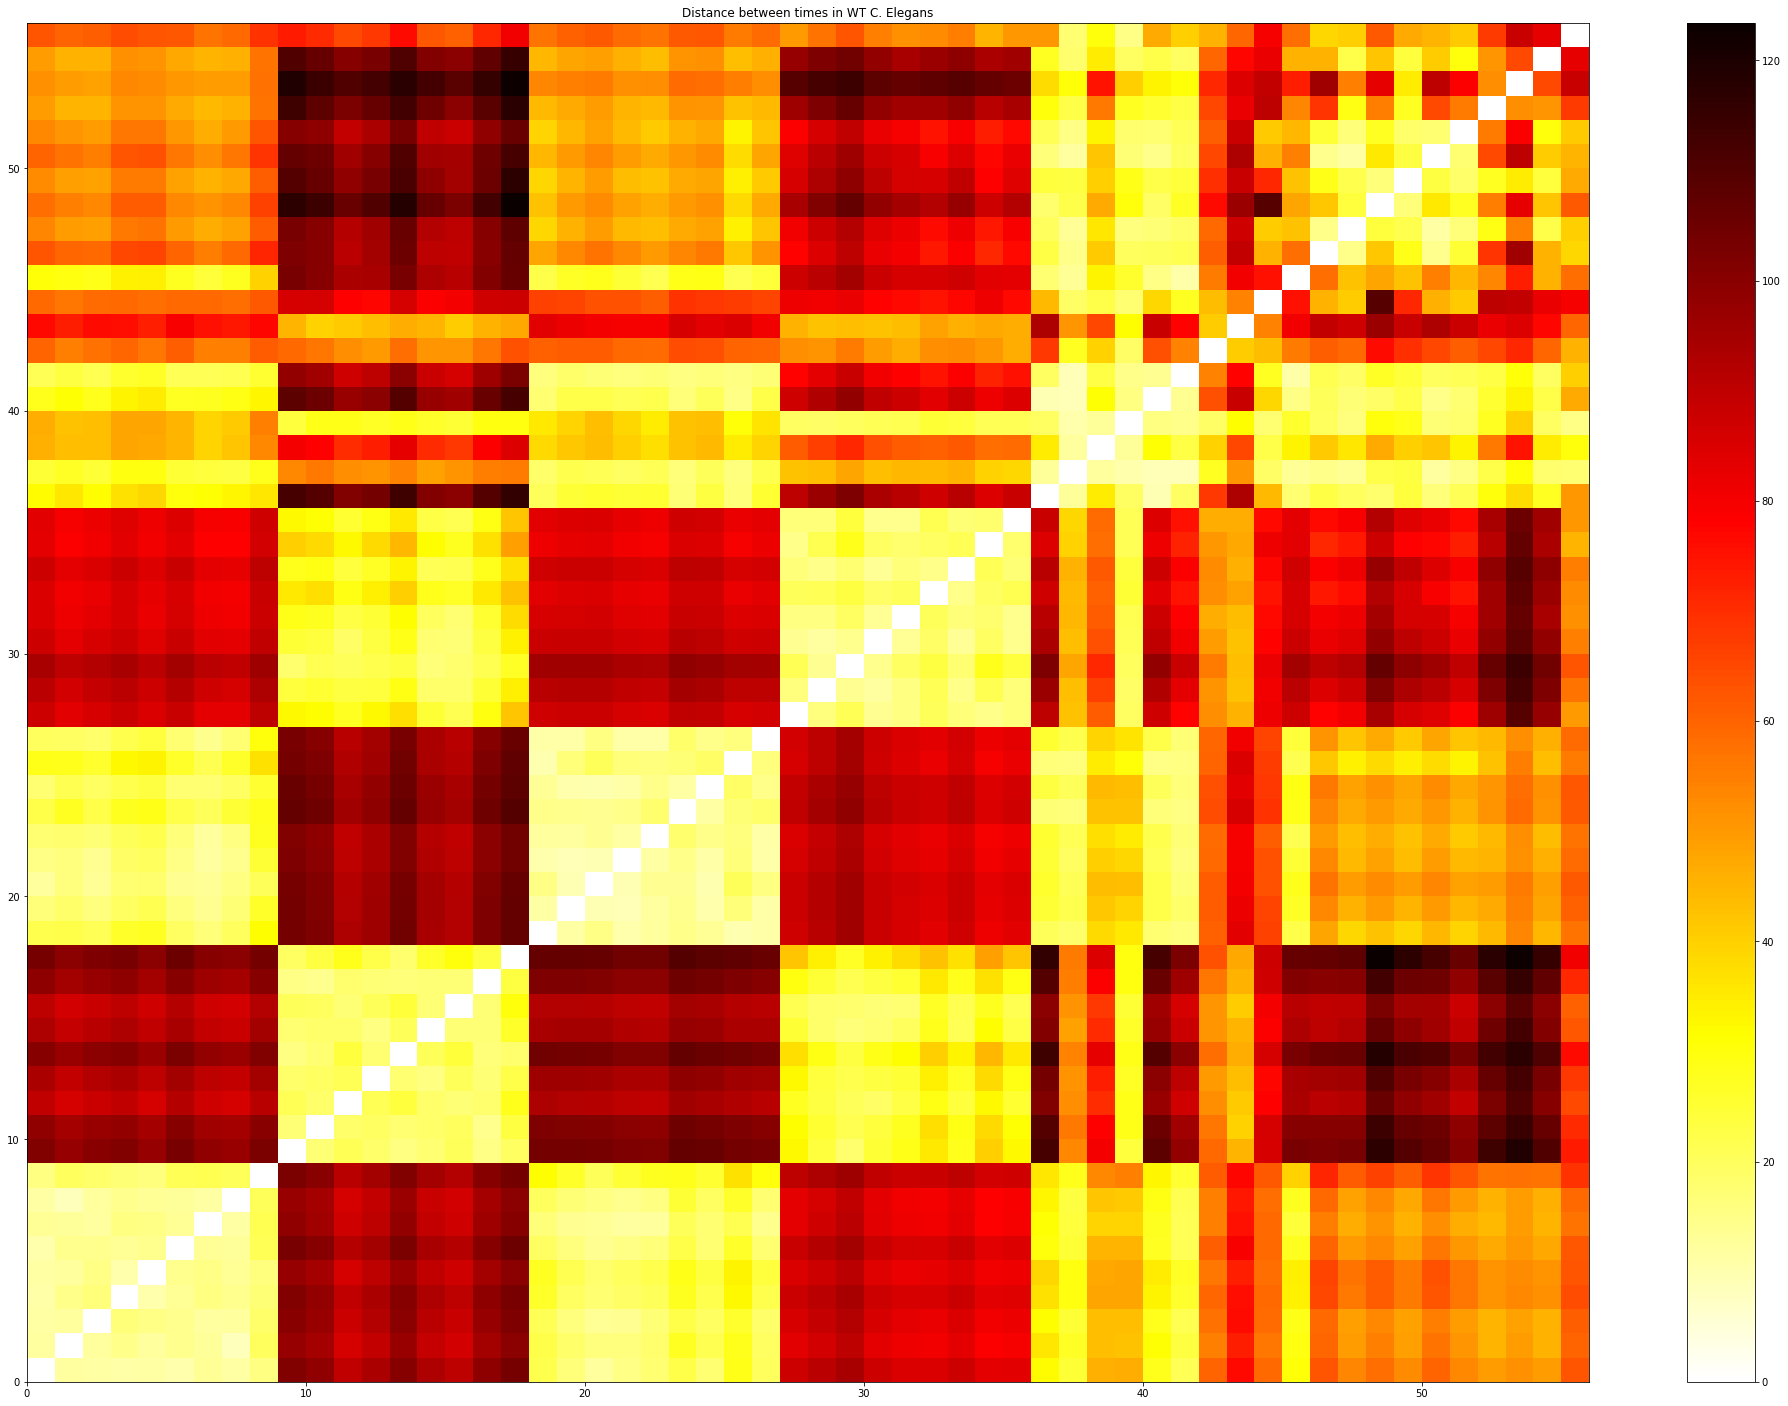

In [668]:
b_mat = []
for a in altered_embryo_dict:
    b_row = []
    for b in altered_embryo_dict:
        b_row.append(branch_distance(a,b))
    b_mat.append(b_row)
b_mat = np.mat(b_mat)
plot_2_examples(['hot_r'],np.mat(b_mat))

In [689]:
def self_comp(imp_mat):
    imp_mat = np.mat(imp_mat)
    imp_mat = np.tril(np.array(imp_mat)).flatten()
    imp_mat = imp_mat[np.where(imp_mat != 0.0)]
    return ('mu',np.mean(imp_mat),'var',np.var(imp_mat))

In [690]:
def out_comp(imp_mat):
    imp_mat = np.mat(imp_mat)
    sample_size = int((min(imp_mat.shape) ** 2 - min(imp_mat.shape)) / 2)
    samples = np.random.choice(imp_mat.flatten().tolist()[0], sample_size)
    return ('mu',np.mean(samples),'var',np.var(samples))

In [445]:
'''b_mat = []
for a in inliers:
    b_row = []
    for b in inliers:
        b_row.append(branch_distance(node_comparison_trimmer(fulldictset[a],'ABal'),node_comparison_trimmer(fulldictset[b],'ABal')))
    b_mat.append(b_row)
b_mat = np.mat(b_mat)
plot_2_examples(['hot_r'],np.mat(b_mat))'''

"b_mat = []\nfor a in inliers:\n    b_row = []\n    for b in inliers:\n        b_row.append(branch_distance(node_comparison_trimmer(fulldictset[a],'ABal'),node_comparison_trimmer(fulldictset[b],'ABal')))\n    b_mat.append(b_row)\nb_mat = np.mat(b_mat)\nplot_2_examples(['hot_r'],np.mat(b_mat))"

In [446]:
'''demo = np.tril(np.array(b_mat)).flatten()
b_mat = demo[np.where(demo != 0.0)]'''

'demo = np.tril(np.array(b_mat)).flatten()\nb_mat = demo[np.where(demo != 0.0)]'

In [694]:
'''
for n in Fate_transforms[0][2:]:
    print(n)
    b_mat = []
    for a in inliers:
        b_row = []
        for b in inliers:
            b_row.append(branch_distance(node_comparison_trimmer(fulldictset[a],n),node_comparison_trimmer(fulldictset[b],n)))
        b_mat.append(b_row)
    b_mat = np.mat(b_mat)
    #plot_2_examples(['hot_r'],np.mat(b_mat))
    demo = np.tril(np.array(b_mat)).flatten()
    b_mat = demo[np.where(demo != 0.0)]
    trip = b_mat
    #if len(trip) == 0: 
    try: KDE(b_mat)
    except: pass
    #continue 
    
    x_d = np.linspace(min(trip), max(trip), 2000)
    density = sum(norm(xi,.85).pdf(x_d) for xi in trip) * 5
    plt.fill_between(x_d, density, alpha=0.5)
    plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
    plt.axis([min(trip), max(trip), -0.5, 75]);
    #plt.clf
'''

"\nfor n in Fate_transforms[0][2:]:\n    print(n)\n    b_mat = []\n    for a in inliers:\n        b_row = []\n        for b in inliers:\n            b_row.append(branch_distance(node_comparison_trimmer(fulldictset[a],n),node_comparison_trimmer(fulldictset[b],n)))\n        b_mat.append(b_row)\n    b_mat = np.mat(b_mat)\n    #plot_2_examples(['hot_r'],np.mat(b_mat))\n    demo = np.tril(np.array(b_mat)).flatten()\n    b_mat = demo[np.where(demo != 0.0)]\n    trip = b_mat\n    #if len(trip) == 0: \n    try: KDE(b_mat)\n    except: pass\n    #continue \n    \n    x_d = np.linspace(min(trip), max(trip), 2000)\n    density = sum(norm(xi,.85).pdf(x_d) for xi in trip) * 5\n    plt.fill_between(x_d, density, alpha=0.5)\n    plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\n    plt.axis([min(trip), max(trip), -0.5, 75]);\n    #plt.clf\n"

In [703]:
def KDE(imp):
    trip = imp
    x_d = np.linspace(min(trip), max(trip), 2000)
    density = sum(norm(xi,1).pdf(x_d) for xi in trip) * 5
    plt.fill_between(x_d, density, alpha=0.5)
    plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
    plt.axis([min(trip), max(trip), -0.5, 30]);
    plt.show()